# 02. Neural Network Classification with TensorFlow

## Classification problem의 종류
|종류|특징|
|---|---|
|Binary classification|이진 분류로, 오직 두개로 분리할 때 사용한다. ex) 철판의 양품, 불량, 심장병 유무 등|
|multi-class classification|여러 가지로 분류할 때 사용. ex) 음식의 종류, 개의 종류 등|
|multi-label classification|한 개의 대상에 여러 개의 label을 붙일 때 사용. 위의 multi-class classification과 다른 점은 위에는 한개의 대상에 한개의 label이 붙지만 이것은 한개의 대상에 여러 개의 label이 붙을 수 있다는 것. <BR>ex) 어떤 기사인지 분류할 때 사용함. 한개의 기사가 AI, machine learning, deep learning 과 같은 카테고리가 할당될 수 있음.|

## What we're going to cover

- Architecture of a claasification medel
- Input shapes and output shapes
  - `X` : features/data (inputs)
  - `y` : labels (outputs)
      - "What calss do the inputs belong to?"
- Creating custom data to view and fit
- Steps in modelling for binary and multicalss classification
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
      - Finding the best learning rate
    - Creating evaluation metircs
  - Fitting a model (getting it to find patterns in our data)
  - Improving a model
- The porwer of non-linearity
- Evaluating classification models
  - Visualizing the model ("visualize, visualize, visualize")
  - Looking at traning curves
  - Compare predictions to ground truth (using our evaluation metrics)


## Tyical architecture of a classification neural network

분류 신경망의 구조는 다루는 문제에 따라 다양함.<br>
그러나, 신경망에서 기본적으로 포함되는 것들이 있음
1. 입력층
2. 은닉층 (hidden layer)
3. 출력층

### 분류 신경망에서 자주 사용되는 표준적인 값

|Hyperparameter|Binary Classification|Multi-call classification|
|------------|--------------|---------------|
|Input layer shape| 특성의 수와 같음(e.g. 5 for age, sex, height, weight, smoking status in hear dieases prediciont)|  Same as binary Classification|
|Hidden layer(s)|Problem specific, minimum = 1, maximum = unlimited| Same as binary classfication|
|Neurons per hidden layer| Problem specific, generally 10 to 100| Same as binary|
|Output layer shape| 1(one class or the other) | 1 per class (e.g. 3 for food, person or dog photo)|
|Hidden activation|Usually ReLU (rectified linear unit) | Same as binary classification|
|Output activation|Sigmoid| Softmax|
|Loss function| Cross entropy (`tf.keras.losses.BinaryCrossentropy` in TensorFlow)| Cross entropy(`tf.keras.losses.CategoricalCrossentropy` in TensorFlow)|
|Optimizer| SGD(stochastic gradient descent), Adam| Same as binary classification|

Table 1: Typical architecture of a classification network. Source: Adapted from page 295 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron

In [1]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end) : {datetime.datetime.now()}")

2.18.0
Notebook last run (end-to-end) : 2025-05-26 11:22:03.919916


## Creating data to view and fit

- 가상의 데이터를 이용하여 이진 분류를 해볼 것임. `make_circles()`

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# See the first 10 Labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
# Make datafram of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
# chek out the differenct labels
circles.label.value_counts()

,count
label,
1,500
0,500


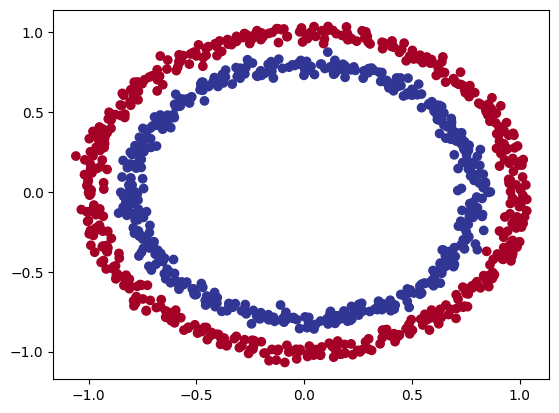

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# check how many samples we have.
len(X), len(y)

(1000, 1000)

In [10]:
# View the first wample of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps in modelling

모델을 만들고 훈련시키기 위해서는 3개의 기본적인 단계가 있다.
1. **Creating a model** - piece together the layers of a neural network yoursel(using the functional or sequentail API) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in th data (how does `X` get to `y`).


In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Seqeuntial API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4459 - loss: 4.0421
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4706 - loss: 0.7810
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4657 - loss: 0.7254
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4646 - loss: 0.7081
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4647 - loss: 0.7012


In [12]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X,y, epochs=200, verbose=0) # set verbose = 0  to remove training updates
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

In [13]:
## layer 추가
# set random seed
tf.random.set_seed(2025)

# 1.Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose = 0 to make the output print less

In [14]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.6932  


[0.6933407783508301, 0.5]

## Imporving a model

1. **Creating a model** - here you might want to add more layers, increate the number of hidden units (also callend neurons) within each layer, change the activation functions of each layer.
2. **Compliling a model** - you might want to choose a different optimiztion function (such as the Adam optimizer, whid is usually pretty good fo many problems) or perhaps change the learning rate of the optimixation function
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it trainging for longer).


In [15]:
# set random seed
tf.random.set_seed(42)

# 1. create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4553 - loss: 4.1338
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4949 - loss: 0.7211
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4919 - loss: 0.6982
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4442 - loss: 0.6993
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4571 - loss: 0.7004
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4528 - loss: 0.7012
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4520 - loss: 0.7019
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4522 - loss: 0.7024
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4567 - loss: 0.7029
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4506 - loss: 0.7032
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4513 - loss: 0.7036
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [16]:
# to visualize our model's predictions. we will create a fuction

import numpy as np

def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's our
        print("doing multiclass classification...")
        # we have to reshape our precitions to goet them ready for plotting
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    else:
        print("doing binary classificaion...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classificaion...


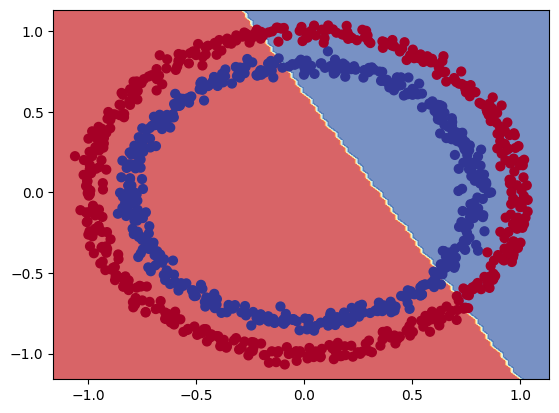

In [17]:
# chekc out the predicions our model is making
plot_decision_boundary(model_3, X, y)

In [18]:
# set random seed
tf.random.set_seed(42)

# create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
  • training=True
  • mask=None

In [19]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [20]:
# setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Change the loss and metircs of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metirc to be regression-specific

# Fit the recopiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 350.1108 - mae: 350.1108
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 219.2554 - mae: 219.2554 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 88.5063 - mae: 88.5063   
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 64.5158 - mae: 64.5158 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 81.0180 - mae: 81.0180 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 53.0670 - mae: 53.0670 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 47.7595 - mae: 47.7595 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 43.8114 - mae: 43.8114 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45.5440 - mae: 45.5440 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44.1396 - mae: 44.1396 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 40.9456 - mae: 40.9456
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.3588 - mae: 40.3588 
Epoch 13/100
5/5 ━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


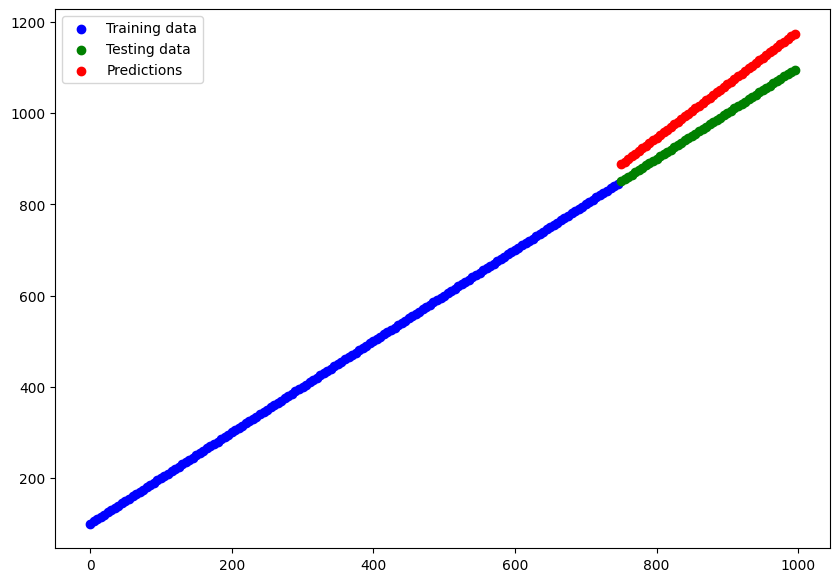

In [21]:
# make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();


## The missing piece: Non-linearity

In [22]:
## hidden layer 에 activation 함수 추가
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
    tf.keras.layers.Dense(1) # output layer
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics=['accuracy'])

#3. Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4842 - loss: 6.0586
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4855 - loss: 5.9226
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4833 - loss: 5.8555
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4837 - loss: 5.8486
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4808 - loss: 5.8172
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4806 - loss: 5.8138
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4806 - loss: 5.8121
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4806 - loss: 5.8108
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4806 - loss: 5.8095
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4806 - loss: 5.8083
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4806 - loss: 5.8072
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

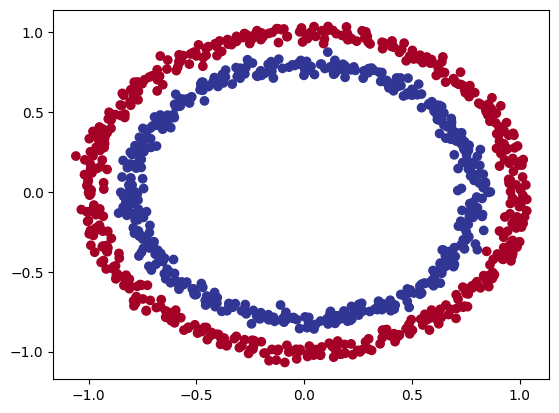

In [23]:
# check out our data
plt.scatter(X[:,0],X[:,1], c=y , cmap=plt.cm.RdYlBu);

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classificaion...


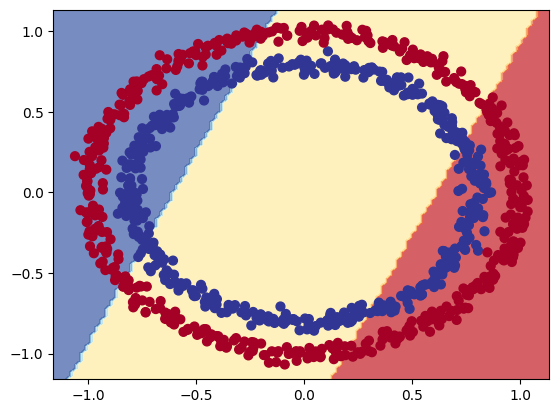

In [24]:
# check the decision boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [27]:
## 은닉층 추가 및 뉴론 개수 증가
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1) # output layer
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs =100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4789 - loss: 1.8463
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4790 - loss: 1.2549
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4785 - loss: 1.0536
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4763 - loss: 0.9704
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4756 - loss: 0.9119
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4732 - loss: 0.8664
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4757 - loss: 0.8308
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4791 - loss: 0.8035
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4833 - loss: 0.7822
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4846 - loss: 0.7634
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4850 - loss: 0.7505
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [28]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8445 - loss: 0.4863


[0.48302093148231506, 0.8489999771118164]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classificaion...


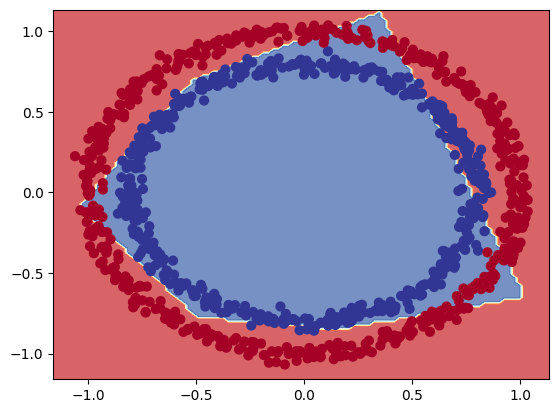

In [29]:
# check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

In [33]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras. optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
histroy = model_7.fit(X, y, epochs=100, verbose=0)

In [34]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9404 - loss: 0.3820


[0.37948599457740784, 0.9319999814033508]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
doing binary classificaion...


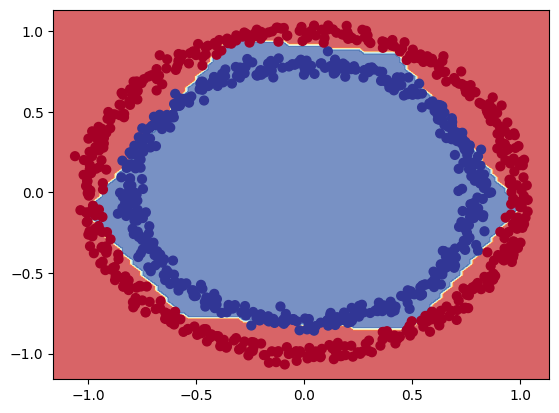

In [35]:
# View the predicions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [36]:
# Create a toy tensor( similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

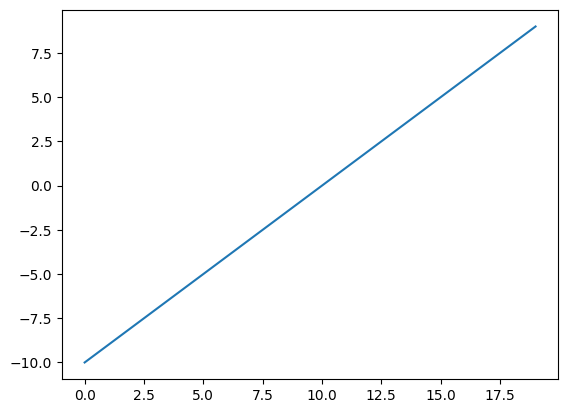

In [37]:
# Visualize our toy tensor
plt.plot(A);

In [38]:
# Sigmoid
def sigmoid(x):
    return 1/(1+tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

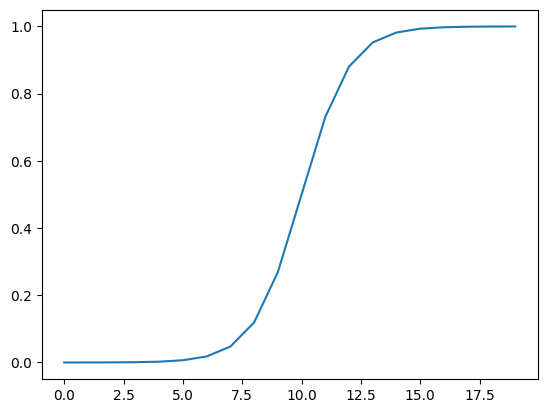

In [41]:
# plot sigmoid modified tensor
plt.plot(sigmoid(A));

In [42]:
# Relu
def relu(x):
    return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

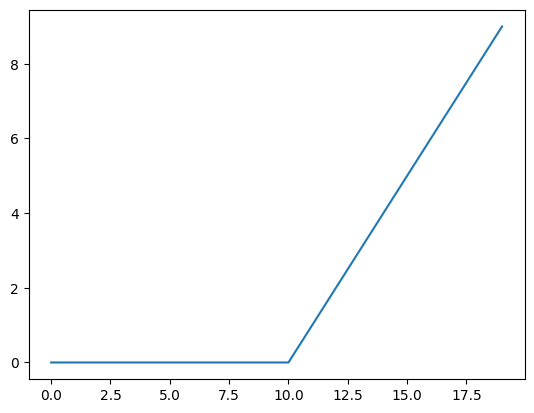

In [43]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

## Evaluating and improving our classification model

In [44]:
# How many example are in the whole dataset?
len(X)

1000

In [45]:
# split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80 % of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# check the shapes of the data
X_train.shape, X_test.shape # 800 example in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model (sam as mode_7)
model_8 = tf.keras.Sequential([
     tf.keras.layers.Dense(4,activation='relu'), # hidden layer 1, using "relu"
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(1, activation="sigmoid")
 ])

 # 2. complite the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                 metrics=['accuracy'])

 # 3.Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5445 - loss: 0.7030
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5468 - loss: 0.6778 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6023 - loss: 0.6706 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6040 - loss: 0.6605 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6817 - loss: 0.6435 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7314 - loss: 0.6199 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7558 - loss: 0.5906 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7642 - loss: 0.5598
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7773 - loss: 0.5258 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8064 - loss: 0.4961 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8113 - loss: 0.4583 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

In [54]:
# Evaluate our model on the test set
loss, accuracy =  model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9806 - loss: 0.0621 
Model loss on the test set: 0.058287087827920914
Model accuracy on the test set: 98.50%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classificaion...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classificaion...


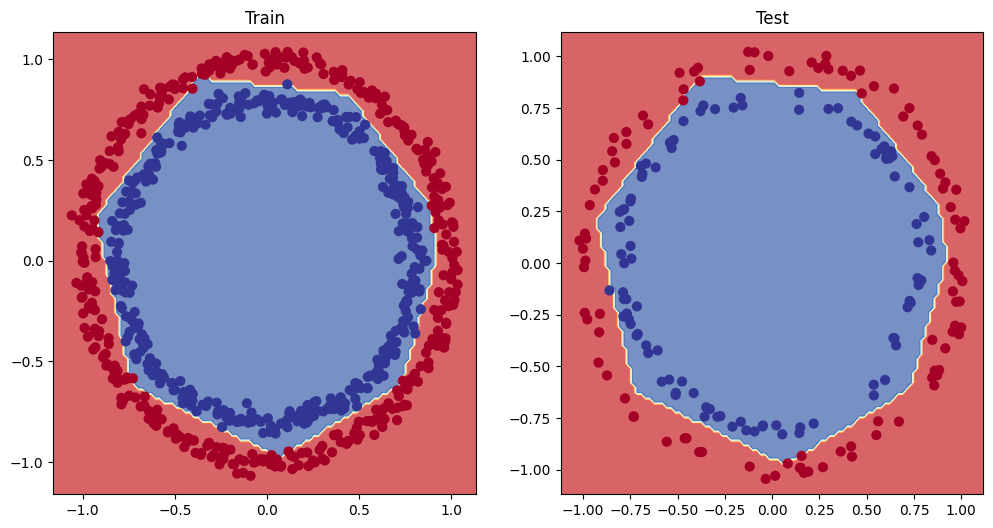

In [56]:
# Plot the decision boundaries for the trainin and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss curves

In [57]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.55875,0.687605
1,0.57625,0.673914
2,0.60750,0.664414
3,0.62375,0.651662
4,0.71875,0.632094
5,0.75625,0.606318
6,0.77000,0.576730
7,0.77500,0.544734
8,0.79125,0.511483
9,0.81250,0.482613


Text(0.5, 1.0, 'Model_8 training curves')

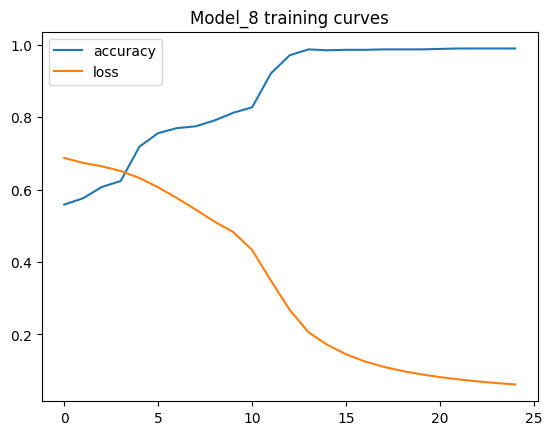

In [59]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [62]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use string here too
                optimizer="Adam",
                metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, y_train, epochs = 100,
                     callbacks=[lr_scheduler])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5029 - loss: 0.6883 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5011 - loss: 0.6881 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5040 - loss: 0.6879 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5037 - loss: 0.6877 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5042 - loss: 0.6875 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5032 - loss: 0.6873 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5097 - loss: 0.6870 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5102 - loss: 0.6868 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5121 - loss: 0.6865 - learning_

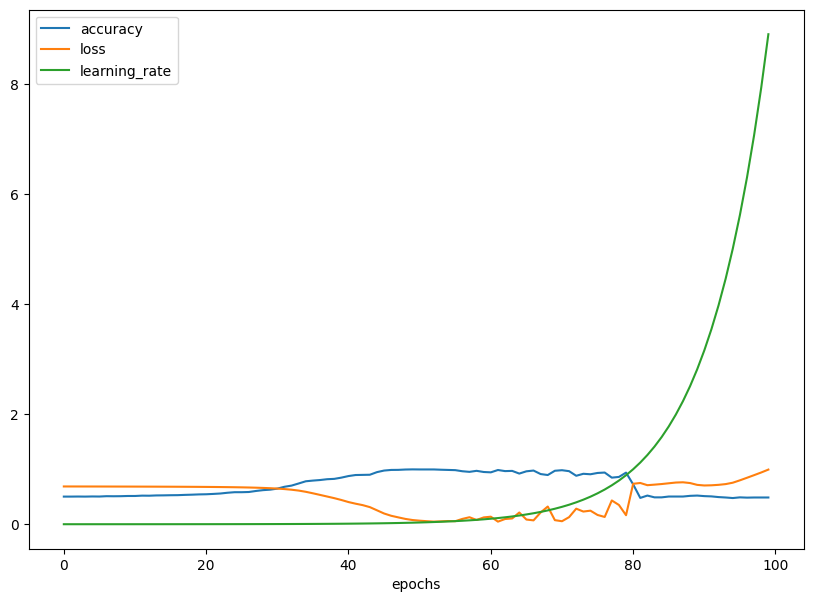

In [63]:
# checkout the hisotry
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

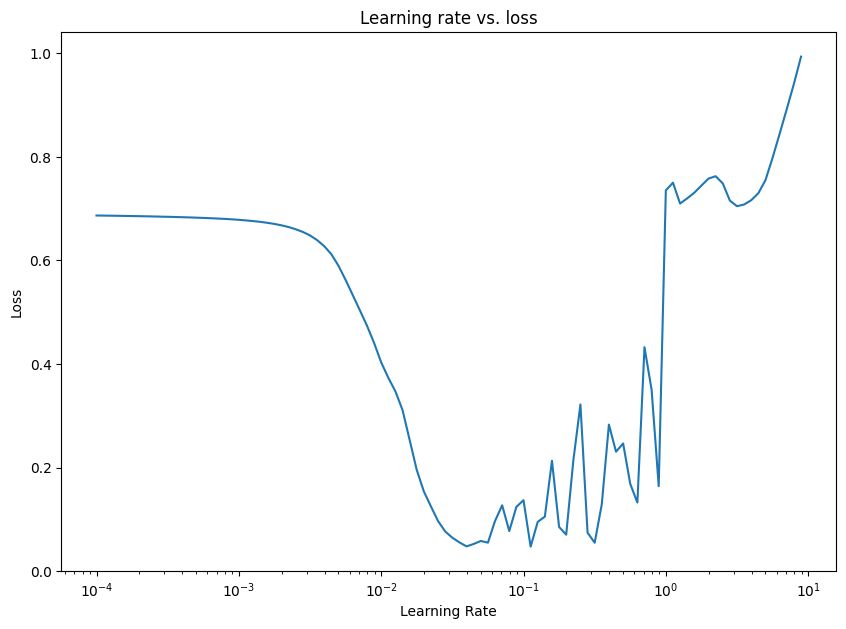

In [64]:
# Plot the learning rate versus the loss
lrs = 1e-4 *(10 ** (np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [65]:
# Example of other typical learning rate values

10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [69]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilte the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate = 0.02),
                  metrics=['accuracy'])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5001 - loss: 0.6946
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5510 - loss: 0.6847
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5607 - loss: 0.6776
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5793 - loss: 0.6645
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6050 - loss: 0.6492
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6953 - loss: 0.6125
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7440 - loss: 0.5668
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8224 - loss: 0.4900
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8653 - loss: 0.3879
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9103 - loss: 0.3014
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9480 - loss: 0.2370
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9608 - lo

In [71]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9688 - loss: 0.0988  


[0.0867510512471199, 0.9750000238418579]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classificaion...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classificaion...


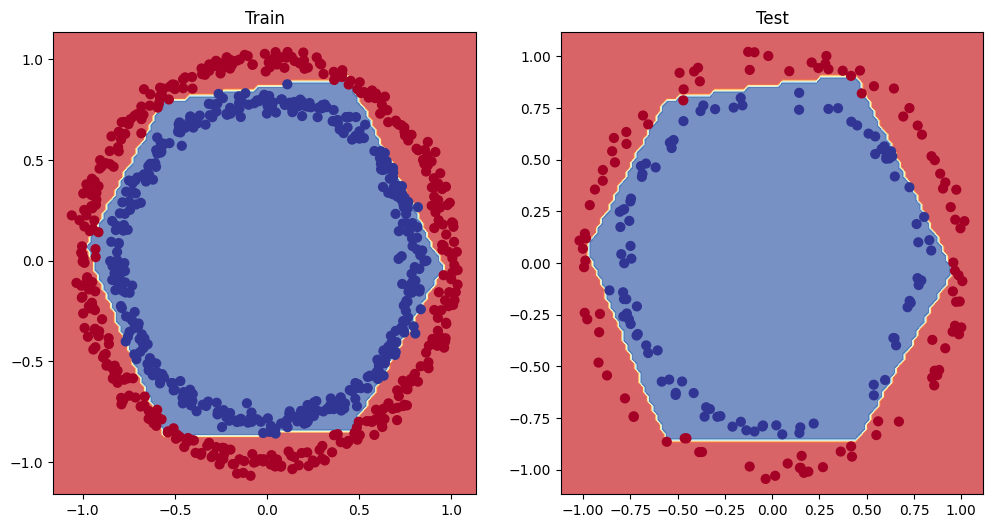

In [72]:
# Plot the decesion boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

|Metric name/Evaluatation method|Definition|Code|
|-------------|----------------|--------------|
|Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correc.|`sklearn.metrics.accuracy_score()` or `tf.keras.metrics.Accuracy()`|
|Precision| Proportion of true positives voer total number of samples.Higher precision leads to less false positives (model predicts 1 when it should've been 0)| `sklearn.metrics.precision_score()` or `tf.keras.metrics.Precision()`|
|Recall | Proportion of true positives over totla number of true positives and false negarives (model predics 0 when it should've been 1). Higher recall leads to less false negatives.|`sklearn.metrics.recall_score()` or `tr.keras.metrics.Recall()`|
|F1-score| Combines precision and recall into one metric. 1 is best, 0 is worst.|`sklearn.metrics.f1_score()`|
|Confusion matrix|Compares the precited values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right(diagnol line). | Custom fucntion of `sklearn.metrics.plot_confusion_matrix()`|
|Classification report|Collection of some of the main classificaion metrics such as precision, recall and f1-score|`sklearn.metrics.classifiction_report()`|

In [74]:
# check the accuracy of our model
loss,accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set {loss}")
print(f"Model accuracy on test set : {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9688 - loss: 0.0988 
Model loss on test set 0.0867510512471199
Model accuracy on test set : 97.50%


In [76]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predicions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [77]:
# view the first 10 predictions
y_preds[:10]

array([[0.80358315],
       [0.96972704],
       [0.9931522 ],
       [0.9818902 ],
       [0.6247683 ],
       [0.17223613],
       [0.9677719 ],
       [0.00257534],
       [0.91827685],
       [0.00157848]], dtype=float32)

In [78]:
# view the first 10 predictions
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [79]:
# Convert predition probablilites to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [80]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[96,  5],
       [ 0, 99]])

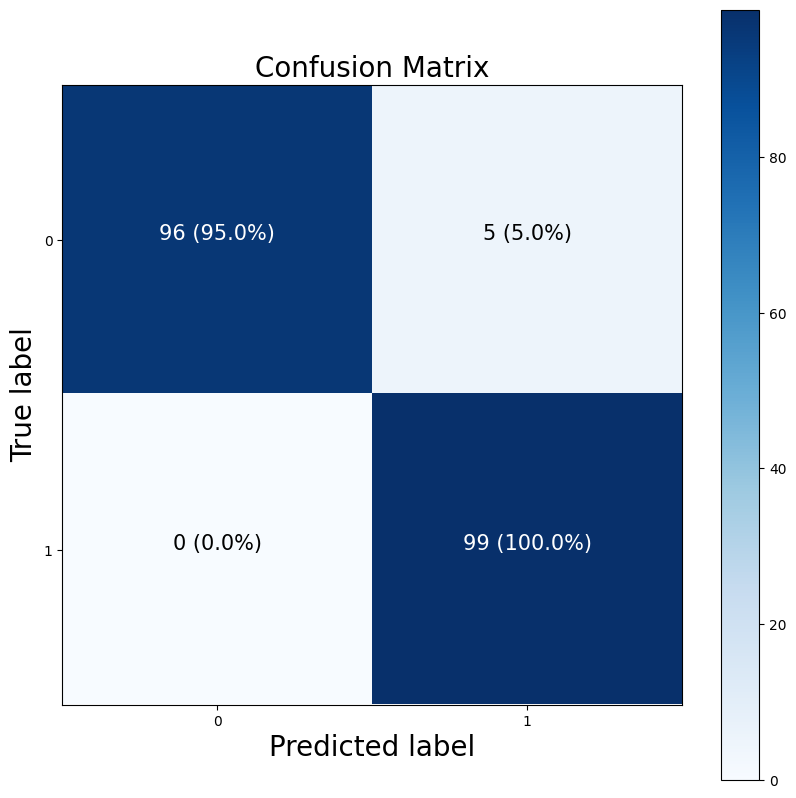

In [87]:
## make confusion matrix prettier

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") /cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes :
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = ( cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

In [90]:
 # What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    print(i, j)

0 0
0 1
1 0
1 1


## Working with larger example (multiclass classification)

In [96]:
## multi-class classification

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [98]:
# Show the first training example

print(f"Trainig sample:\n{train_data[0]}\n")
print(f"Trainig labe;:{train_labels[0]}")


Trainig sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [99]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [100]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

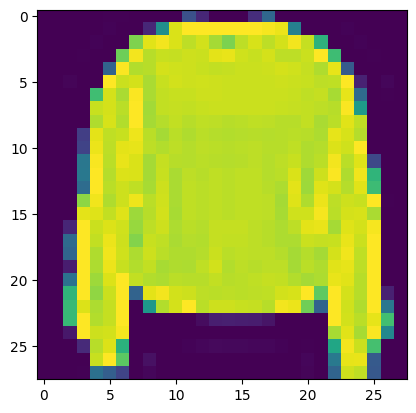

In [101]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [102]:
# Check our sample label
train_labels[7]

np.uint8(2)

In [103]:
class_names = ['T_shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# How many casses are there (this'll be our output shape)?
len(class_names)

10

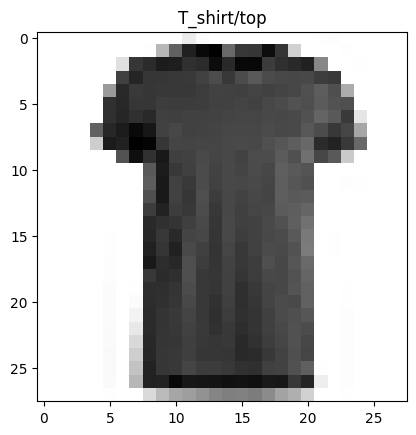

In [104]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

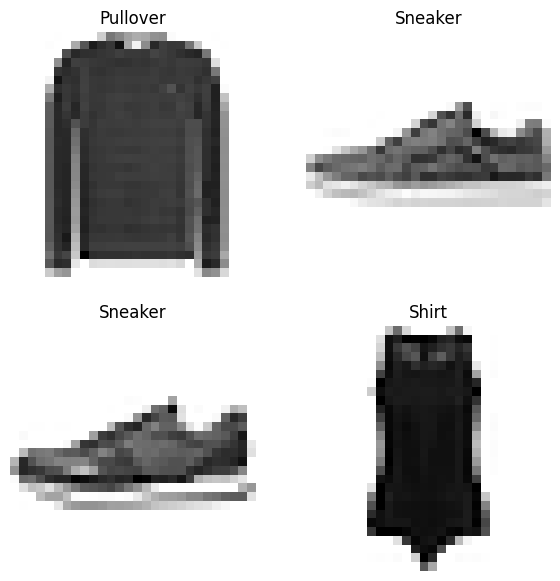

In [108]:
# plot multiple random images of faion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [114]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs = 10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0959 - loss: 4.2525 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0987 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0991 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0986 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0987 - loss: 2.3027 

In [117]:
# check the shapes of our model
# note : the "none" in (none, 784) is for batch_size, we'll cover this in a later modeul
model_11.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [118]:
# Check the min and max values of the trainning data
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

In [120]:
## normaliztion
# check the min and max values of the taining data
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

In [121]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# check the min and max values of the training data
train_data.min(), train_data.max()

(np.float64(0.0), np.float64(1.0))

In [124]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input layer (we had to reshape 28 * 28 to 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Fit the mode (to the normaliaed data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs = 10,
                            validation_data = (test_data, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3289 - loss: 1.7235 - val_accuracy: 0.5710 - val_loss: 1.0438
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6012 - loss: 0.9889 - val_accuracy: 0.6571 - val_loss: 0.8986
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6702 - loss: 0.8592 - val_accuracy: 0.6915 - val_loss: 0.8271
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7065 - loss: 0.7965 - val_accuracy: 0.7228 - val_loss: 0.7731
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7346 - loss: 0.7486 - val_accuracy: 0.7457 - val_loss: 0.7242
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7508 - loss: 0.7057 - val_accuracy: 0.7552 - val_loss: 0.6972
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7626 - loss: 0.6767 - val_accuracy: 0.7627 - val_loss: 0.6742
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7707 - loss: 0.65

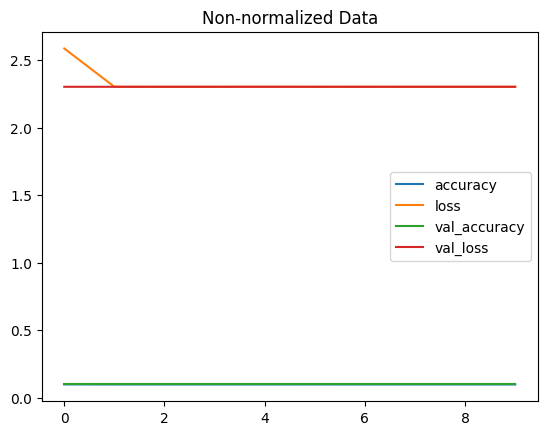

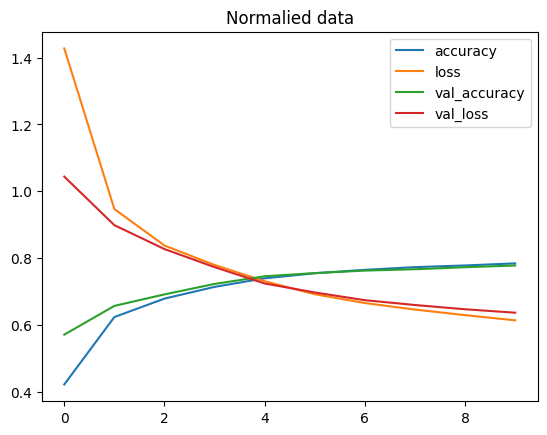

In [128]:
import pandas as pd

# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# plod normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalied data");

In [133]:
# Set random seed
tf.random.set_seed(42)

# create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input layer ( we had to reshape 28*25 to 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10 ** (epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs = 40, # model already doing pretty good
                               validation_data = (test_data, test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4059 - loss: 1.5769 - val_accuracy: 0.6658 - val_loss: 0.9195 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6839 - loss: 0.8828 - val_accuracy: 0.7092 - val_loss: 0.8094 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7181 - loss: 0.7928 - val_accuracy: 0.7333 - val_loss: 0.7490 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7390 - loss: 0.7399 - val_accuracy: 0.7416 - val_loss: 0.7234 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7473 - loss: 0.7107 - val_accuracy: 0.7437 - val_loss: 0.7169 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7541 - loss: 0.6929 - val_accuracy: 0.7507 - val_loss: 0.6980 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7557 

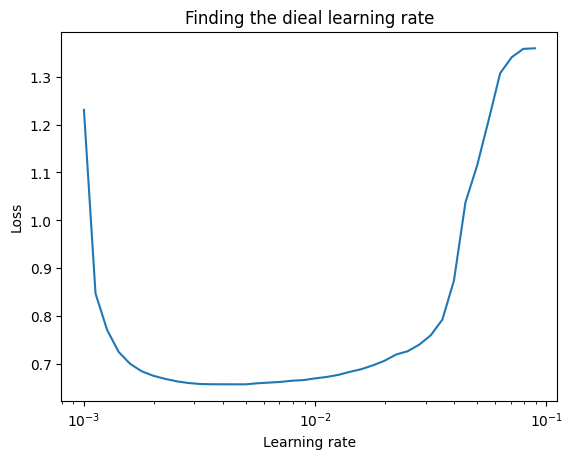

In [134]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 *(10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the dieal learning rate");

In [136]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # input layer (we had to reshape 28*28  to 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs = 20,
                       validation_data = (test_data, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4847 - loss: 1.3332 - val_accuracy: 0.6963 - val_loss: 0.7784
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7141 - loss: 0.7329 - val_accuracy: 0.7232 - val_loss: 0.7191
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7349 - loss: 0.6831 - val_accuracy: 0.7342 - val_loss: 0.6941
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7546 - loss: 0.6559 - val_accuracy: 0.7716 - val_loss: 0.6665
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7844 - loss: 0.6276 - val_accuracy: 0.7775 - val_loss: 0.6496
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7903 - loss: 0.6118 - val_accuracy: 0.7826 - val_loss: 0.6356
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7942 - loss: 0.6006 - val_accuracy: 0.7855 - val_loss: 0.6269
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7981 - loss: 0.5887 - 

In [165]:
#
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), test_size = 15):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels = labels, # axes will labeled with class names ( if they exist) or ints)
           yticklabels=labels)

    # Make x_axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # set the threshold for differendt colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the test on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > threshold else "black",
                 size = test_size)


In [160]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # 'probs' is hsort for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.8878173e-09, 2.3599576e-07, 3.0849056e-13, 4.6674742e-07,
        4.0764308e-15, 3.4882657e-02, 1.4300222e-09, 3.6152029e-01,
        1.2193010e-05, 6.0358429e-01],
       [7.2980794e-05, 2.2093792e-07, 7.5617617e-01, 1.4868996e-04,
        1.7637876e-01, 6.1319828e-29, 6.7222707e-02, 3.2165492e-19,
        4.1592520e-07, 2.0418507e-34],
       [1.3020402e-04, 9.9965131e-01, 1.5775939e-05, 2.0256986e-04,
        5.1790516e-10, 1.1805102e-20, 6.1810461e-08, 1.5961725e-21,
        8.3476134e-14, 5.8636618e-15],
       [7.7394754e-05, 9.9730599e-01, 5.7971138e-05, 2.5584518e-03,
        2.2545215e-08, 1.9338645e-19, 1.8311040e-07, 1.1014168e-18,
        2.2522164e-13, 3.3995571e-12],
       [2.2190697e-01, 2.1080151e-03, 2.4986188e-01, 4.2732500e-02,
        2.4195489e-02, 1.4238831e-10, 4.5542920e-01, 4.1695841e-10,
        3.7658932e-03, 1.6861580e-15]], dtype=float32)

In [161]:
# see the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(np.int64(9), 'Ankle boot')

In [162]:
# Convert all of the prediction from probabilities to labels
y_preds = y_probs.argmax(axis = 1)

# view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [163]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred=y_preds)

array([[788,   1,  22,  72,   3,   5,  96,   0,  13,   0],
       [  7, 936,   6,  45,   2,   0,   4,   0,   0,   0],
       [ 26,   1, 647,  44, 145,   0, 136,   0,   1,   0],
       [ 32,  16,  20, 840,  35,  12,  42,   0,   3,   0],
       [  1,   1, 144,  65, 680,   0, 105,   0,   4,   0],
       [  2,   0,   0,   1,   0, 900,   1,  49,   8,  39],
       [157,   1, 104,  62, 120,   2, 536,   0,  18,   0],
       [  0,   0,   0,   0,   0,  49,   0, 906,   0,  45],
       [  8,   0,   1,   7,   2,  21,  67,   4, 890,   0],
       [  0,   0,   0,   0,   0,  20,   0,  53,   1, 926]])

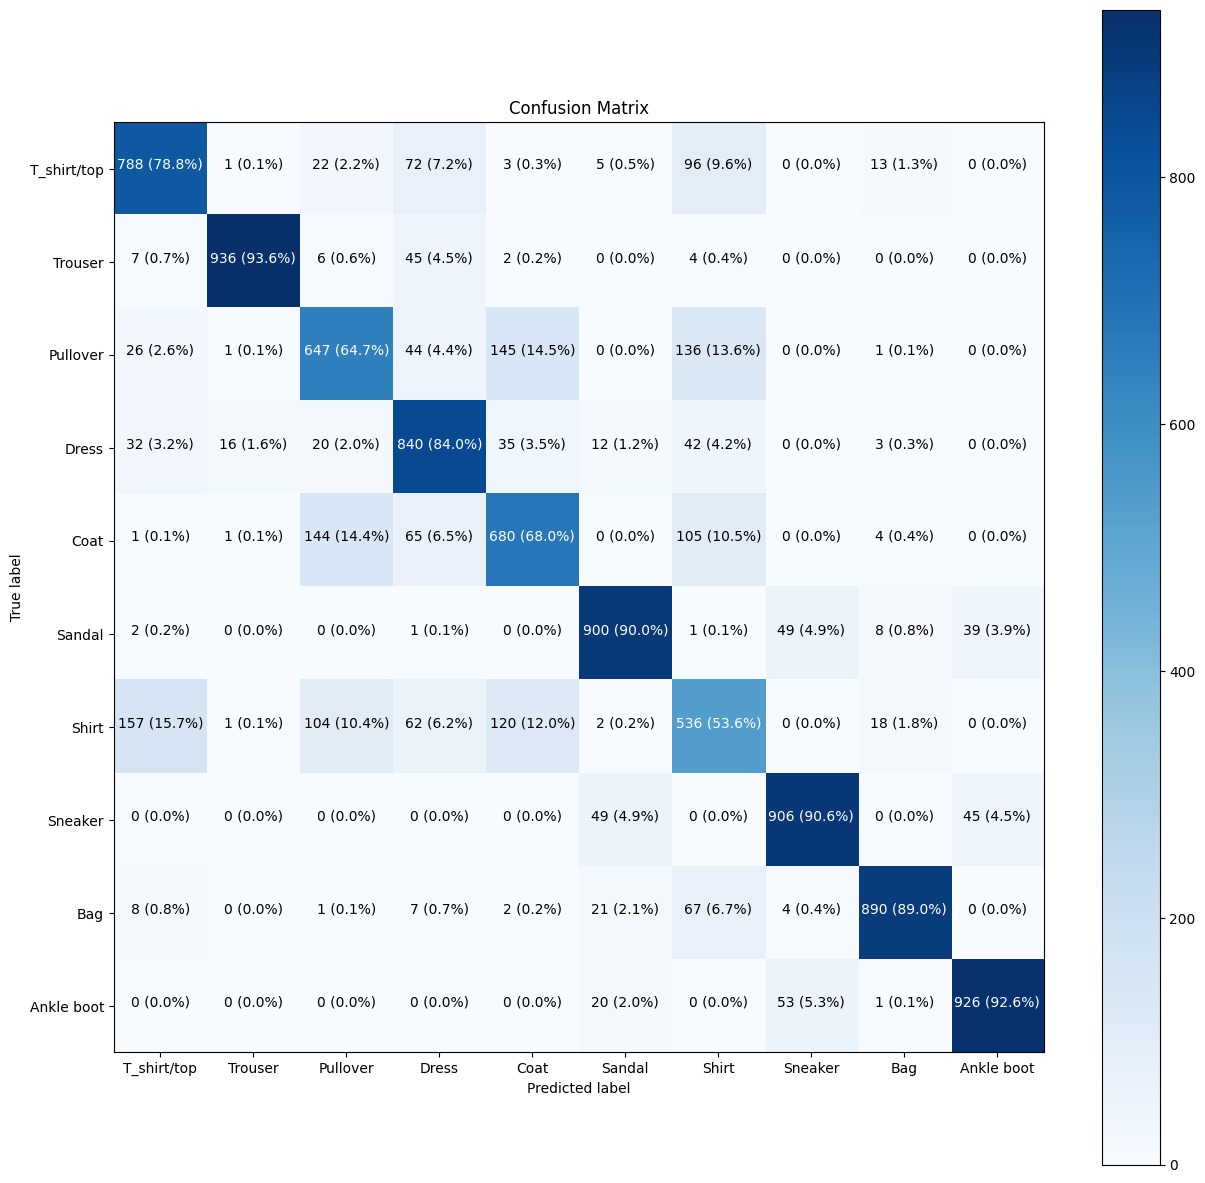

In [166]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true =test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      test_size = 10)

In [173]:
# 모델의 결과를 확인할 때, 모델을 이해하는 데 도움이 됨

import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):

    # set up random integer
    i = random.randint(0, len(images))

    # create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap = plt.cm.binary)

    # change the color of the titles depending on if the predicion is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information(prediction/true label)
    plt.xlabel("Pred : {}{:2.0f}% (True:{})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
               color = color) # set the color to green or red

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


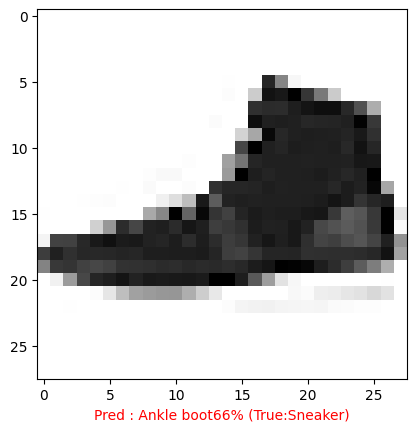

In [184]:
# chek out a random image as well as its prediction
plot_random_image(model = model_14,
                  images = test_data,
                  true_labels = test_labels,
                  classes = class_names)

In [185]:
# Find the layers of our most recent model
model_14.layers

[<Flatten name=flatten_10, built=True>,
 <Dense name=dense_77, built=True>,
 <Dense name=dense_78, built=True>,
 <Dense name=dense_79, built=True>]

In [186]:
# Exract a paricular layer
model_14.layers[1]

<Dense name=dense_77, built=True>

In [187]:
# Get the pattenrs of a layer in our network
weights, biases  = model_14.layers[1].get_weights()

# shape = 1 weight matrix the size of our input data (28*28) per neuron (4)
weights, weights.shape

(array([[-0.3715241 , -0.89865917,  0.46751118,  0.3067026 ],
        [-0.8678932 ,  0.11586943,  0.50674963,  1.0997446 ],
        [-0.9084689 , -0.79576325,  0.43812492,  0.76864886],
        ...,
        [-0.00925076, -0.21148963,  0.18665235,  0.49043944],
        [-0.14885223,  0.21976818, -0.40488443,  0.70233285],
        [ 0.09871174, -0.13566576,  0.197972  ,  0.06297308]],
       dtype=float32),
 (784, 4))

In [188]:
# shape = 1 biase per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 0.6046767 ,  0.3761794 ,  0.49929136, -0.20871124], dtype=float32),
 (4,))

In [189]:
# can now calculate the number of parameters in our model
model_14.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

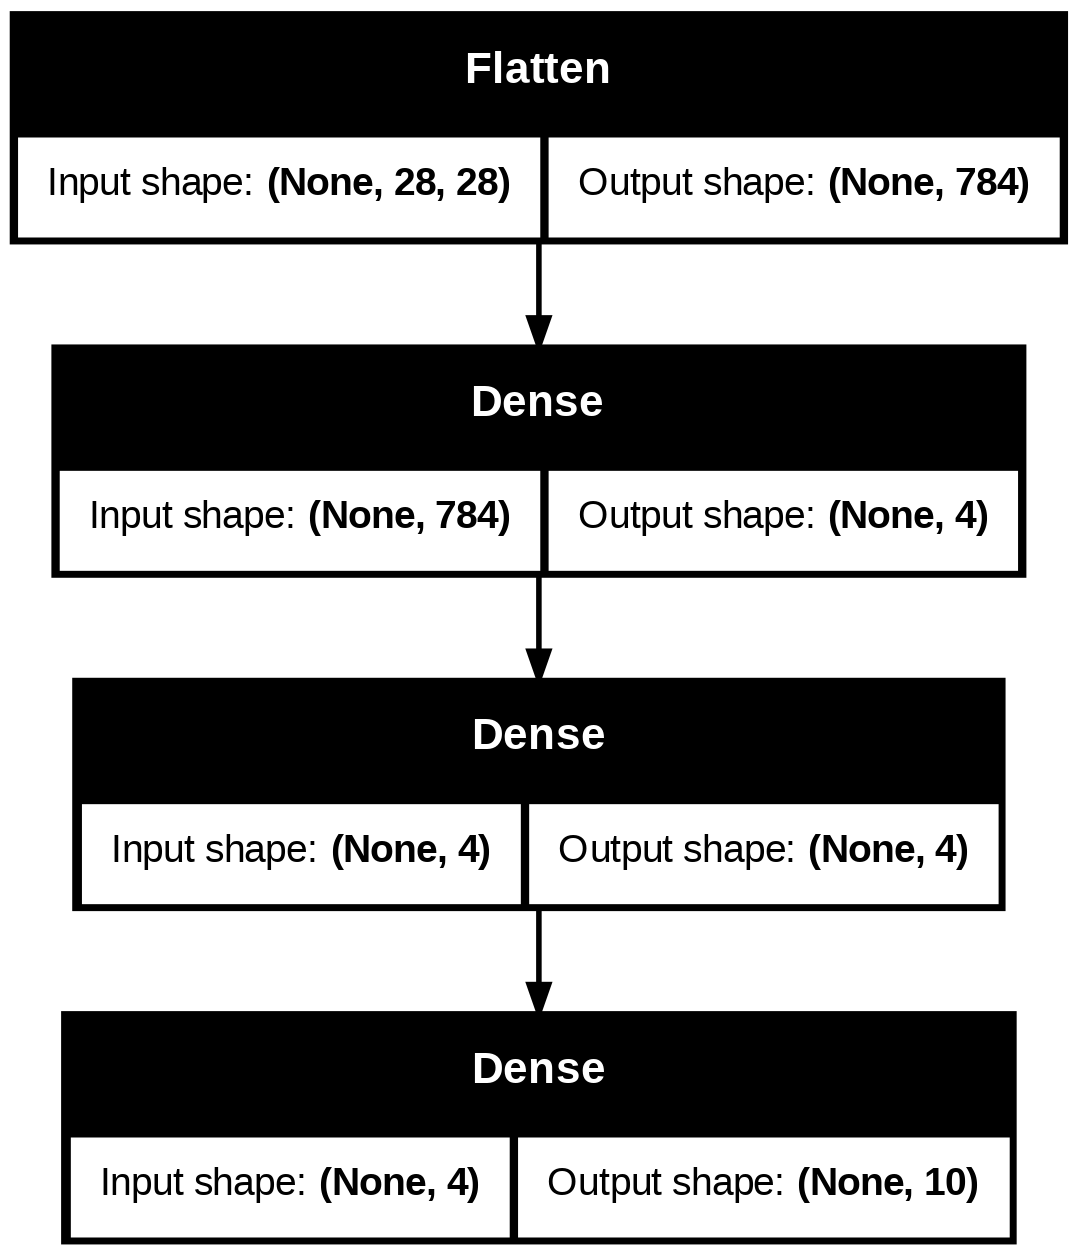

In [190]:
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layer
plot_model(model_14, show_shapes = True)